In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
Data = pd.read_csv('/Volumes/Ramdya-Lab/DURRIEU_Matthias/Experimental_data/MultiSensory_Project/GatedArenas/Results/AutoDataSet.csv')
Data.head()

,Unnamed: 0,Date,Training,Starvation,Relative Time Left,Relative Time Right,Relative Time far Left,Relative Time far Right,Reinforced_side,Peeks Left,Peeks Right,Peeks Top,Face Left,Face Right,Face Top,Long Peeks Left,Long Peeks Right,Long Peeks Top
0,0,22-03-04,Ctrl,Overnight no Water,0.358036,0.641964,0.196914,0.354057,Empty,1.0,0.0,1.0,2.0,7.0,5.0,1.0,0.0,1.0
1,0,22-03-04,Ctrl,Overnight no Water,0.557286,0.442714,0.478373,0.332078,Empty,11.0,1.0,1.0,3.0,1.0,1.0,6.0,0.0,0.0
2,0,22-03-04,Ctrl,Overnight no Water,0.745746,0.254254,0.523853,0.174992,Empty,2.0,1.0,2.0,8.0,0.0,4.0,0.0,0.0,1.0
3,0,22-03-04,Ctrl,Overnight with water,0.515069,0.484931,0.357243,0.219925,Empty,1.0,1.0,3.0,4.0,2.0,6.0,0.0,1.0,2.0
4,0,22-03-04,Ctrl,Overnight with water,0.674293,0.325707,0.478666,0.024975,Empty,2.0,0.0,1.0,2.0,4.0,4.0,1.0,0.0,1.0


In [3]:
Melted = pd.melt(Data,
                 id_vars=['Training', 'Starvation','Reinforced_side'],
                 value_name = 'Count',
                 value_vars=['Peeks Left', 'Peeks Right', 'Peeks Top', 'Long Peeks Left', 'Long Peeks Right', 'Long Peeks Top','Face Left', 'Face Right', 'Face Top'],
                 var_name='Type')

In [4]:
conditions = [
    (Melted['Type'].str.contains('Long')),
    (Melted['Type'].str.contains('Face')),
    (('Long' not in Melted['Type']) & ('Face' not in Melted['Type'])) # This is not really working but still gives expected result
]

values = ['Squeeze', 'Fronts', 'Peeks']
Melted['Beh'] = np.select(conditions,values)
Melted.head()

,Training,Starvation,Reinforced_side,Type,Count,Beh
0,Ctrl,Overnight no Water,Empty,Peeks Left,1.0,Peeks
1,Ctrl,Overnight no Water,Empty,Peeks Left,11.0,Peeks
2,Ctrl,Overnight no Water,Empty,Peeks Left,2.0,Peeks
3,Ctrl,Overnight with water,Empty,Peeks Left,1.0,Peeks
4,Ctrl,Overnight with water,Empty,Peeks Left,2.0,Peeks


In [5]:
conditions = [
    ((Melted['Type'].str.contains('Right'))),
    ((Melted['Type'].str.contains('Left'))),
    (Melted['Type'].str.contains('Top')),
]

values = ['Rewarded Side', 'Punished Side', 'Empty Side']
Melted['Condition'] = np.select(conditions,values)
Melted.head()

,Training,Starvation,Reinforced_side,Type,Count,Beh,Condition
0,Ctrl,Overnight no Water,Empty,Peeks Left,1.0,Peeks,Punished Side
1,Ctrl,Overnight no Water,Empty,Peeks Left,11.0,Peeks,Punished Side
2,Ctrl,Overnight no Water,Empty,Peeks Left,2.0,Peeks,Punished Side
3,Ctrl,Overnight with water,Empty,Peeks Left,1.0,Peeks,Punished Side
4,Ctrl,Overnight with water,Empty,Peeks Left,2.0,Peeks,Punished Side


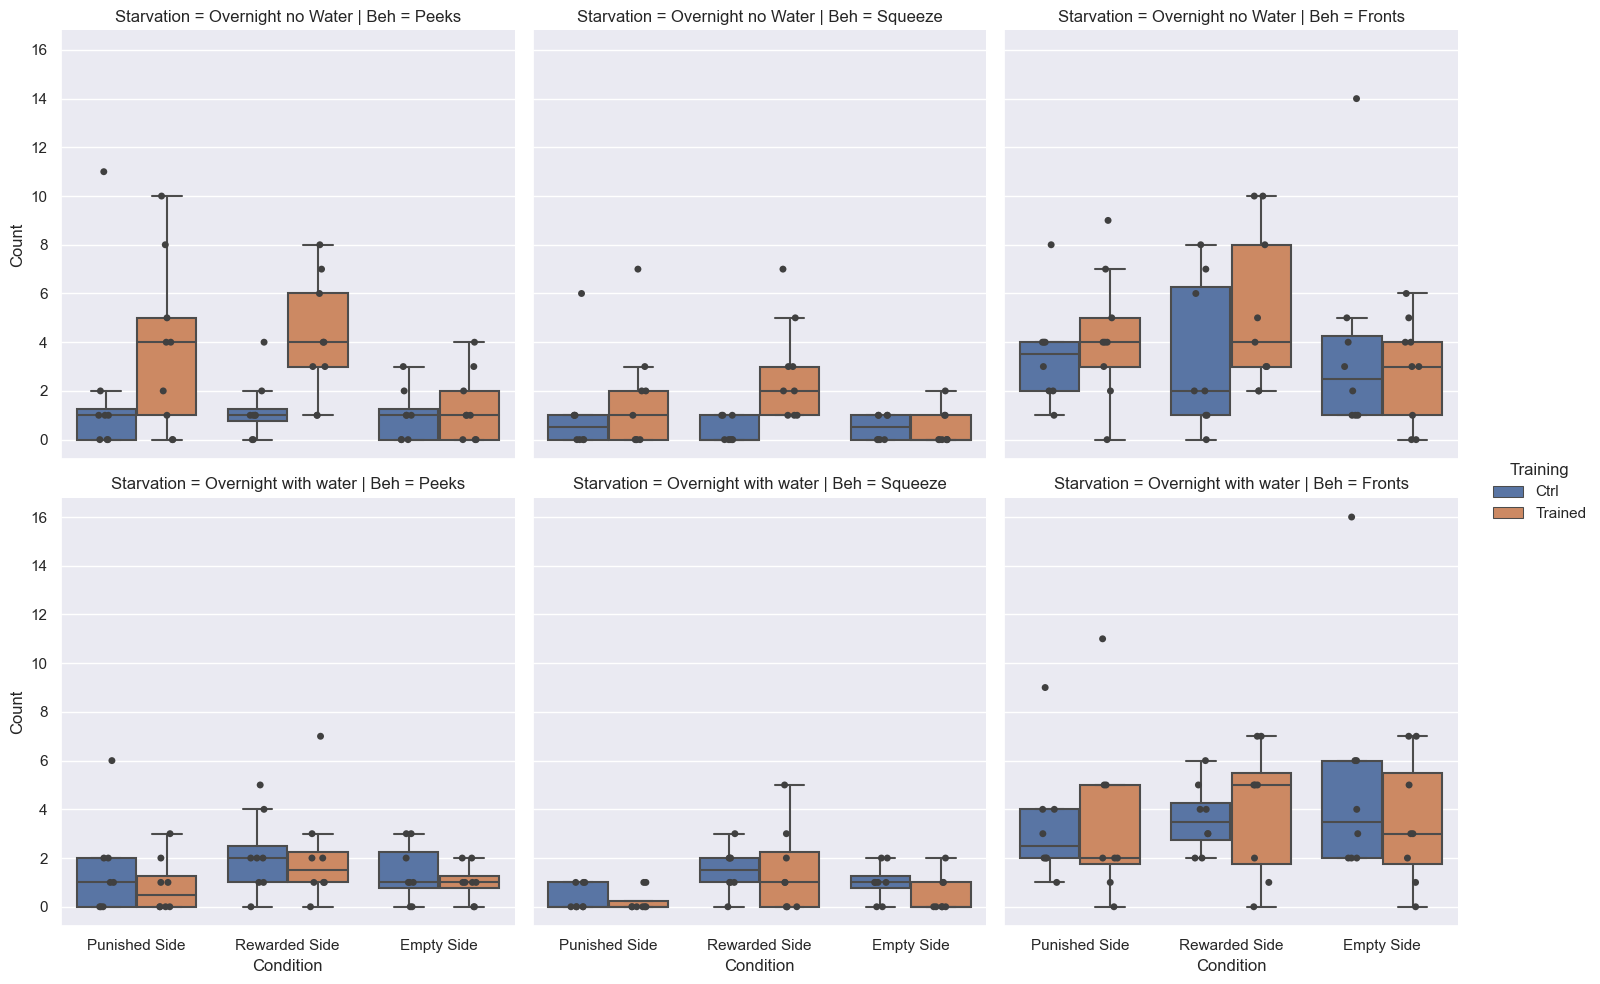

In [12]:
sns.set(font_scale=1)
g=sns.catplot(x='Condition', y = 'Count',
            hue='Training', showfliers = False,
            col='Beh',
            kind="box",
            row='Starvation',
            data= Melted)
g.map_dataframe(sns.stripplot,x='Condition', y = 'Count',
            hue='Training', dodge=True,
            palette=["#404040"])
plt.show

plt.savefig('/Volumes/Ramdya-Lab/DURRIEU_Matthias/Experimental_data/MultiSensory_Project/GatedArenas/Results/220722_BehaviorPlot.png')

In [ ]:
Melted.Training = pd.Categorical(Melted.Training,
                                 categories=['Trained', 'Ctrl'])